от https://gist.github.com/comcon1
https://gist.github.com/comcon1/39580bfde0550e2ab9fbd7a28a4bb68f

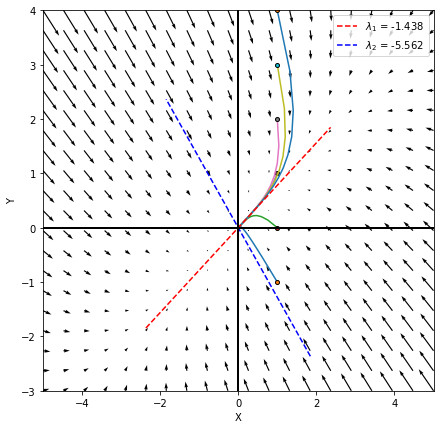

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Our equation system has a form:
# x' = P(x,y)
# y' = Q(x,y)

P = lambda x,y: -3*x + 2*y
Q = lambda x,y: +2*x - 4*y


fun = lambda p,t: [ P(p[0],p[1]), Q(p[0],p[1]) ]
#            p - vector input [x,y] 
#            : - output vector [x', y']

plt.figure(figsize=(7,7))

# plot few phase trajectories
x0_ = 1.0
tt = np.linspace(0,100, 1000)
for y0_ in [-1,0,1,2,3,4]:
    xy0 = [x0_, y0_]
    zz = odeint(fun, xy0, tt)
    plt.plot(zz[:,0], zz[:,1])
    plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# visualize the vector field
xx = np.linspace(-5,5,20)
yy = np.linspace(-3,4,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

# visualize eigenvectors of the Jacoby matrix
mtx = np.array([[-3, 2],[2,-4]])
vals, vecs = np.linalg.eig(mtx)
plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\lambda_1$ = %.3f' % vals[0])
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\lambda_2$ = %.3f' % vals[1])

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5)
plt.ylim(-3,4)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()